# Importation des librairies

In [82]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Téléchargement des données

In [94]:
df = pd.read_csv("/Users/salahabbad/Downloads/Life Style Data/data/Final_data.csv")
df = df.drop(columns ="Burns Calories (per 30 min)_bc")
df.shape
print(df.head())
print(df.columns)

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...   BMI_calc  \
0                      1.00          1080.90     Strength  ...  24.870447   
1                      1.37          1809.91         HIIT  ...  23.479709   
2                      0.91           802.26       Cardio  ...  21.148123   
3                      1.10          1450.79         HIIT  ...  32.449827   
4                      1.08          1166.40     Strength  ...  14.831372   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0         

# Statistiques descriptives et graphiques

In [84]:
df.isnull().values.any()

np.False_

In [104]:
moyenne_age = df['Age'].mean()
nbhomme_femme = df['Gender'].value_counts()
pct_homme = df[df['Gender'] == 'Female']
pct_homme = (pct_homme.shape[0] / df.shape[0]) * 100
pct_femme = 1 - pct_homme
type_entrainement = df['Workout_Type'].value_counts()
pct_gras_moyen = df['Fat_Percentage'].mean()
df_homme = df[df['Gender'] == 'Male']
pct_gras_moyen_homme = df_homme['Fat_Percentage'].mean()
print(type_entrainement)
print(pct_gras_moyen)
df_stat = df.describe().round(2)


Workout_Type
Strength    5071
Yoga        5032
HIIT        4974
Cardio      4923
Name: count, dtype: int64
26.101313358952215


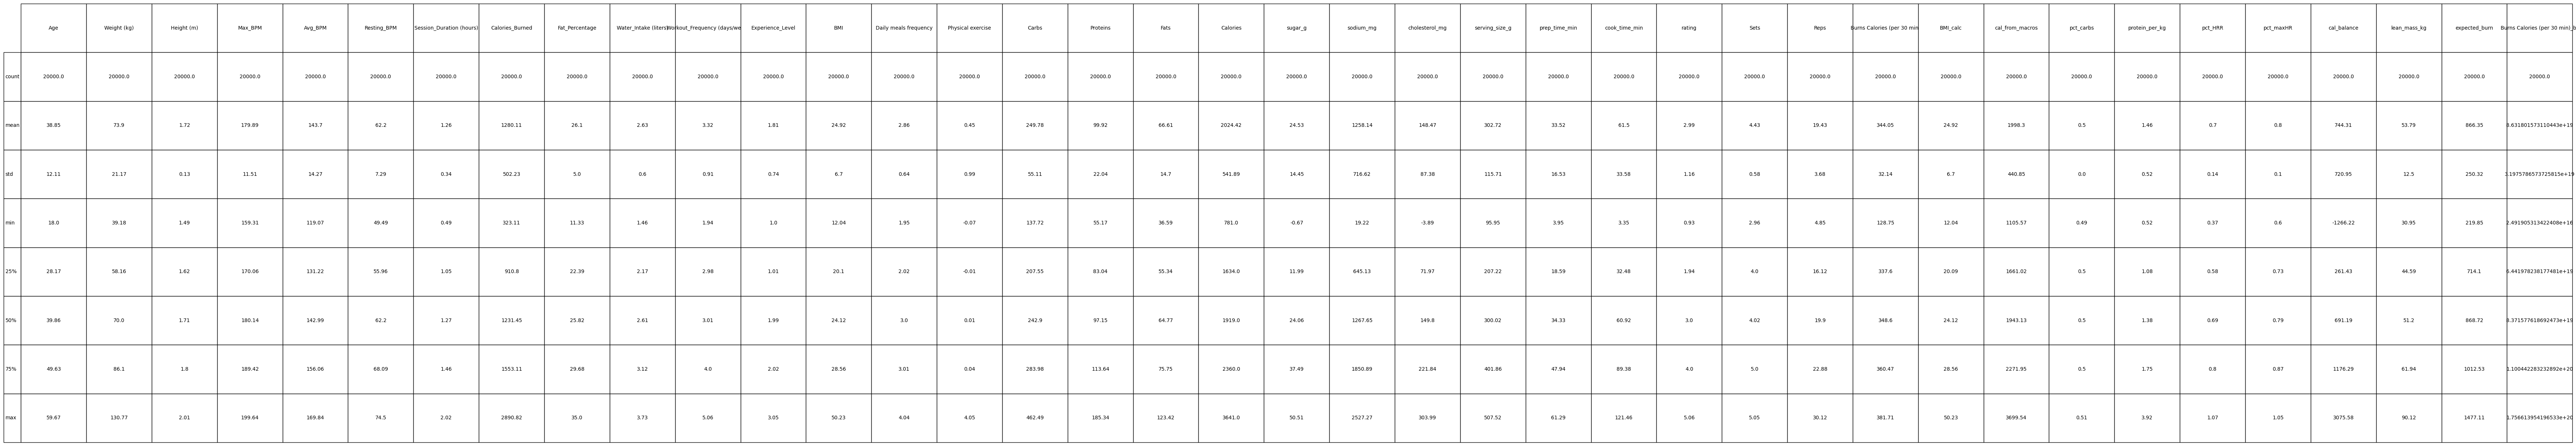

In [86]:
# Création du visuel
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Pas d’axes

# Affichage du tableau
table = ax.table(
    cellText=df_stat.values,
    rowLabels=df_stat.index,
    colLabels=df_stat.columns,
    cellLoc='center',
    loc='center'
)

# Mise en forme
table.scale(15, 8)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

/var/folders/gj/z9fc5_5j6v35c3w_lzkxp_n00000gn/T/ipykernel_63402/911619170.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


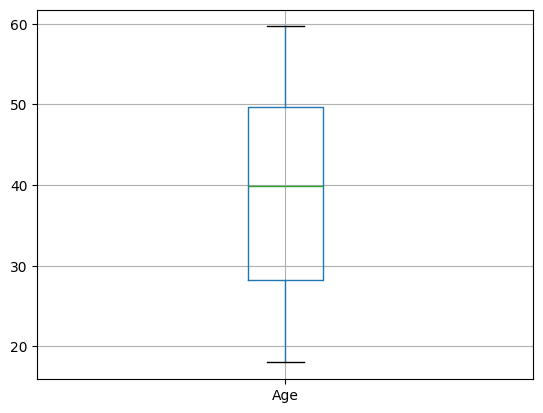

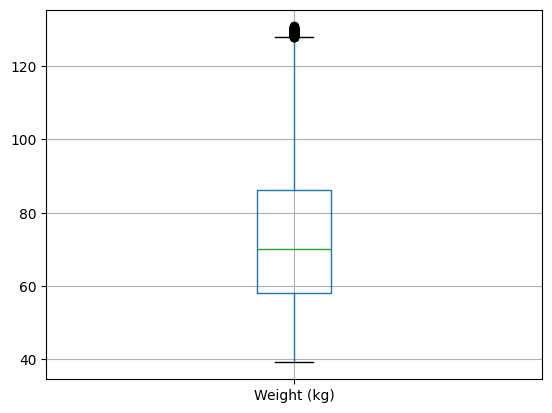

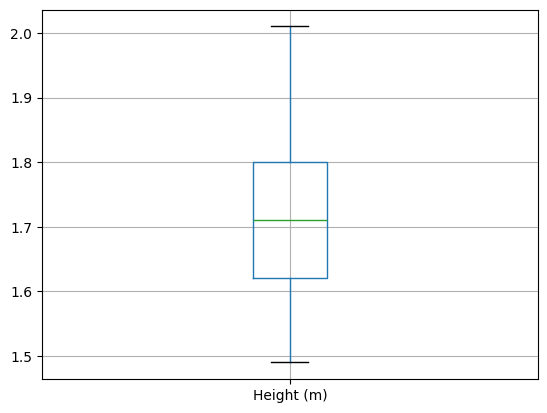

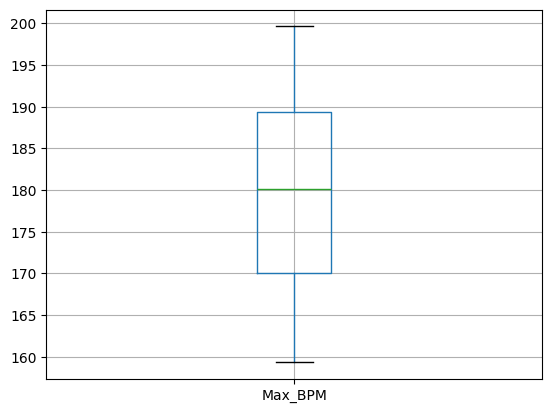

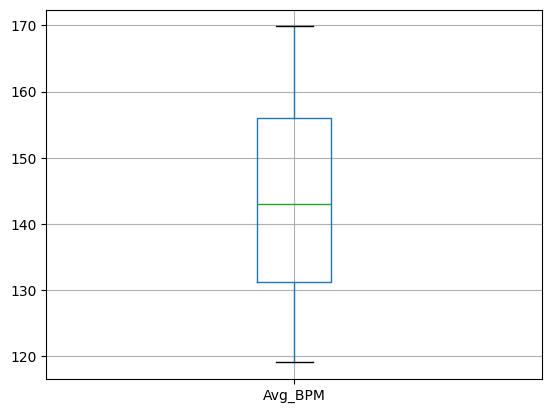

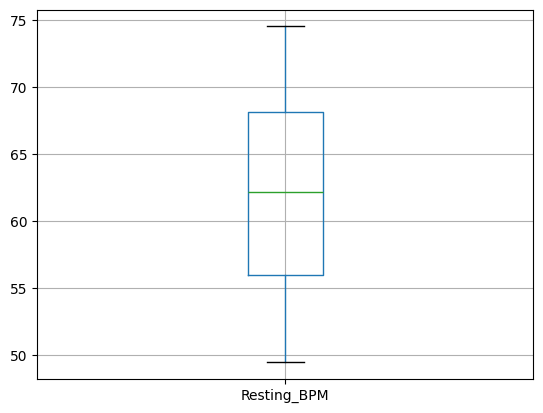

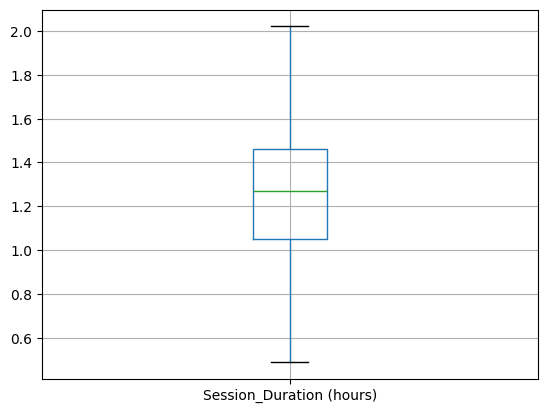

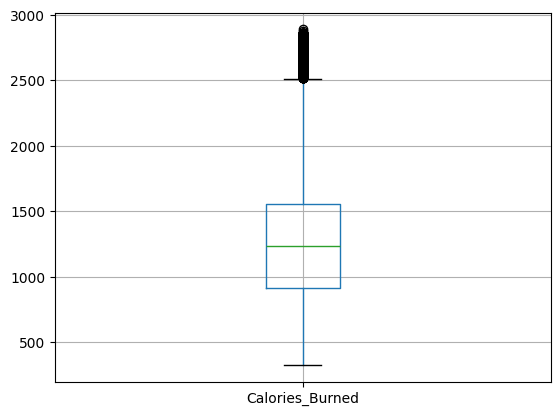

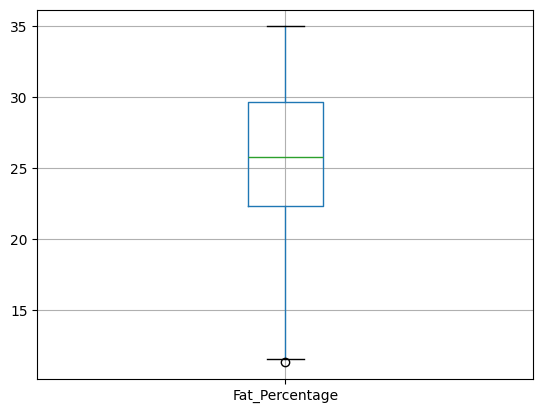

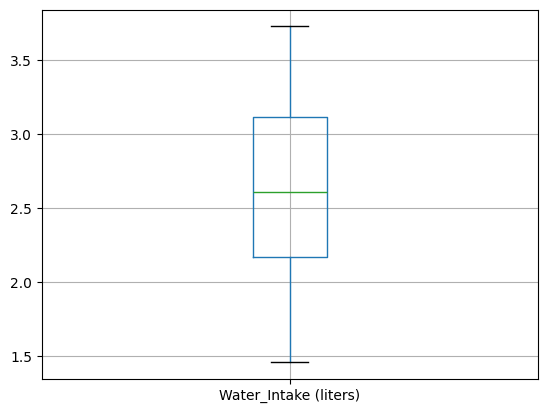

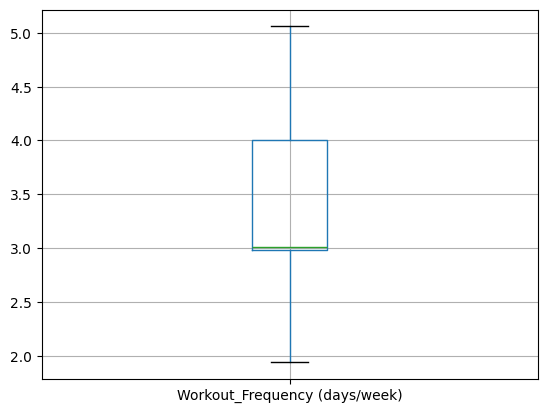

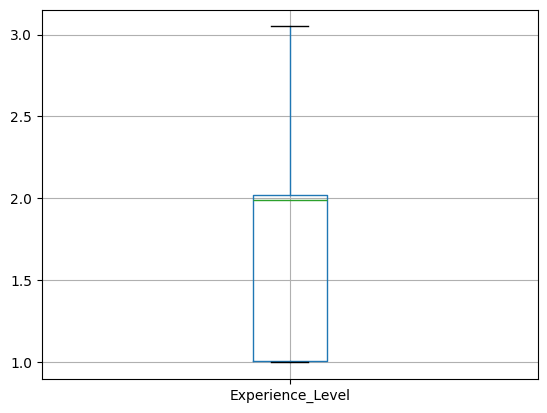

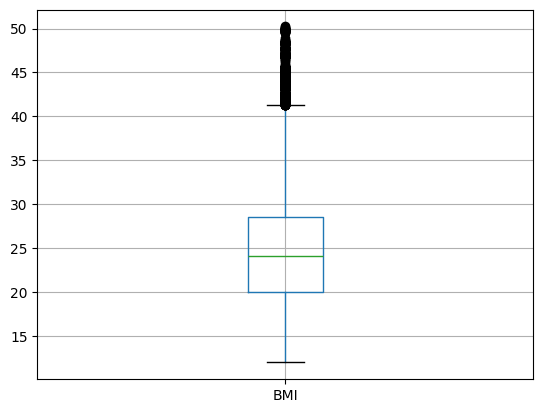

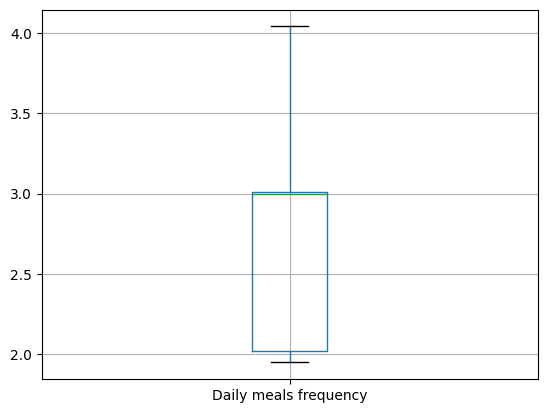

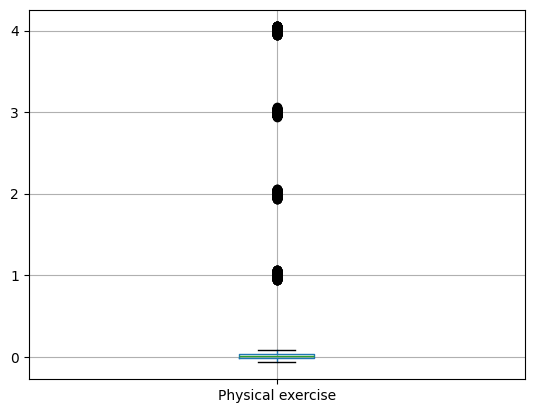

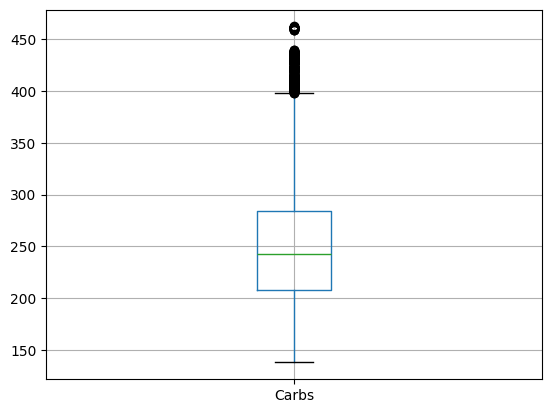

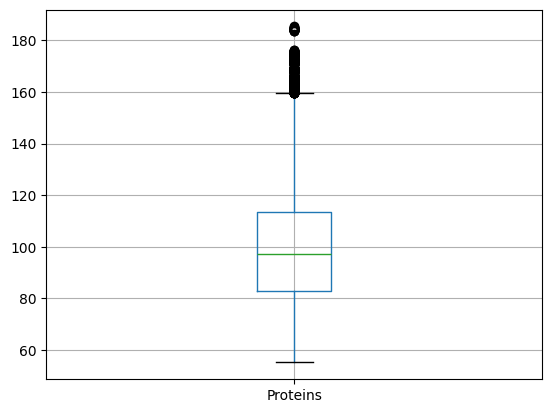

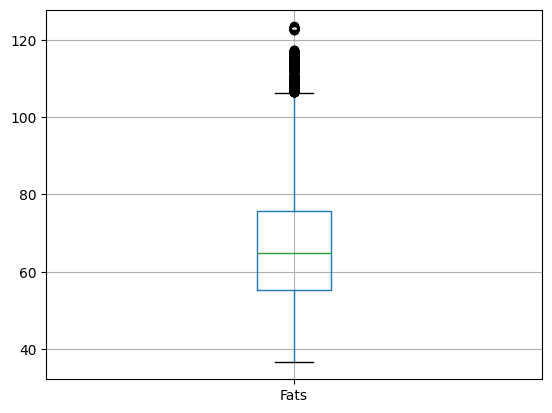

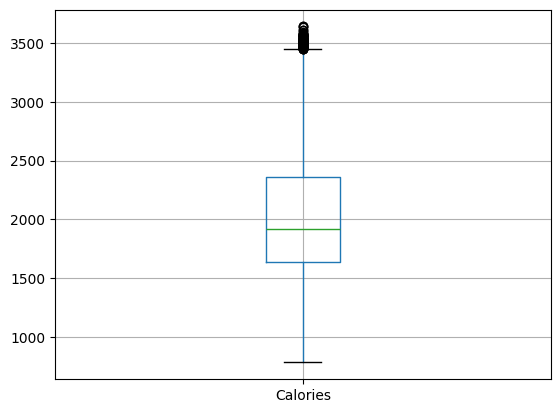

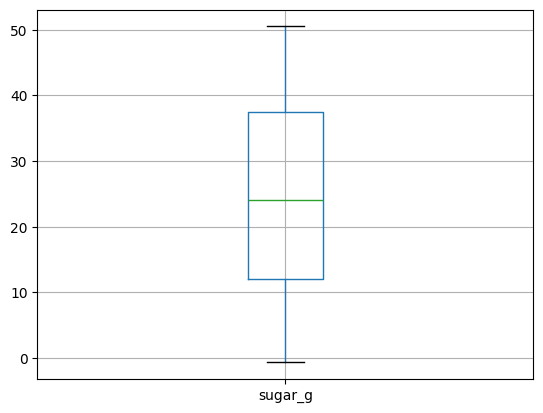

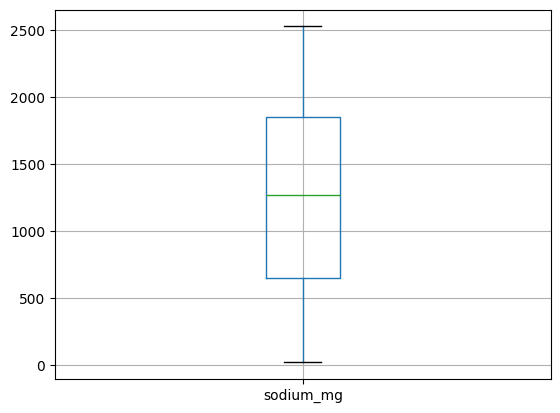

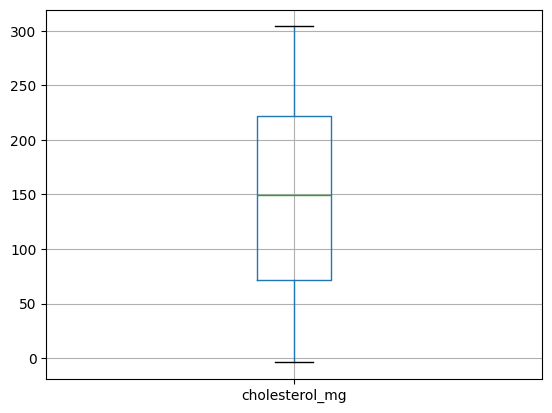

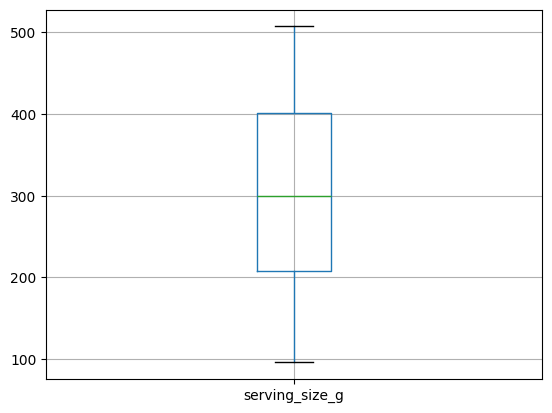

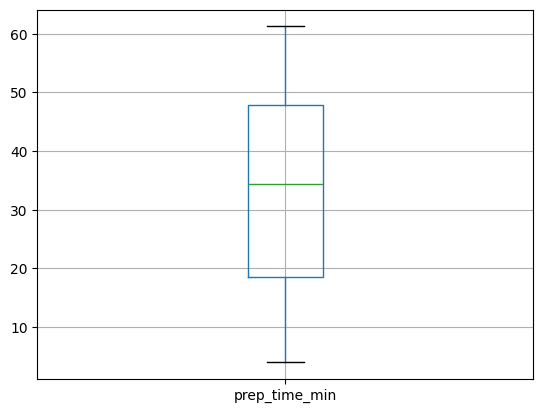

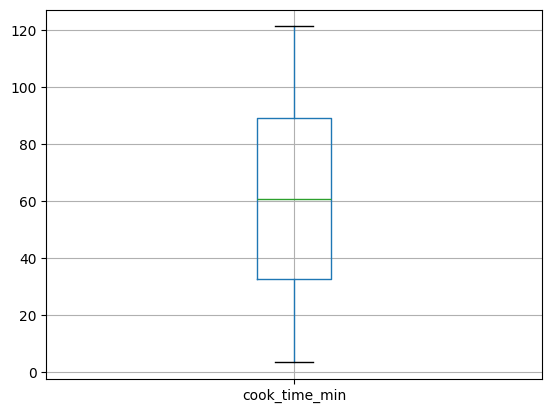

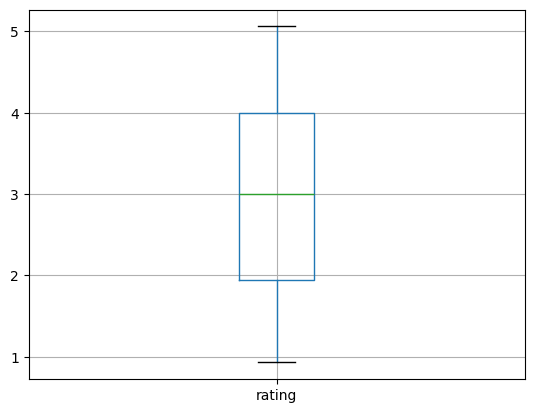

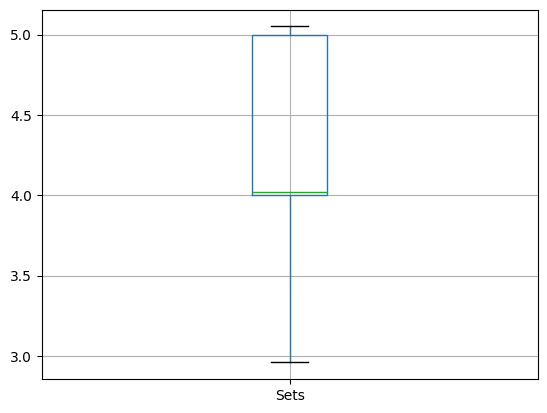

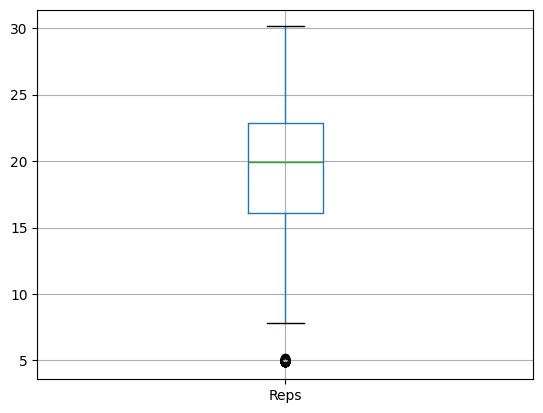

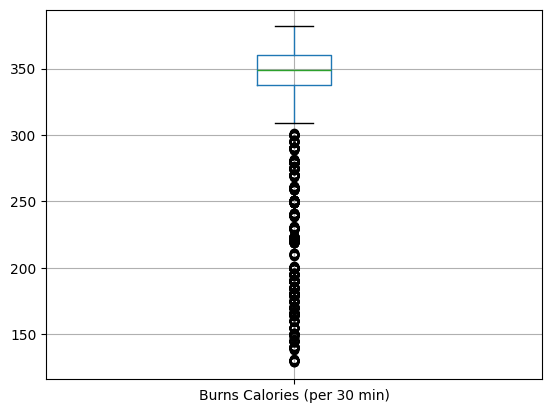

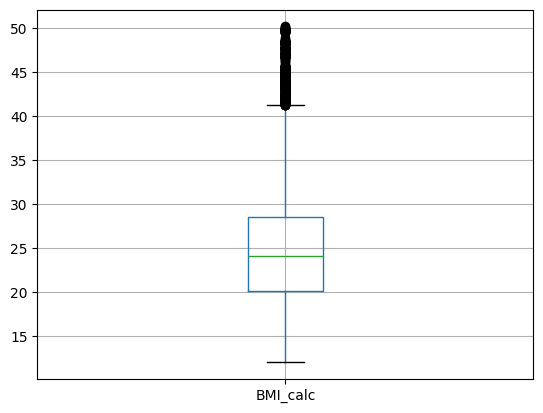

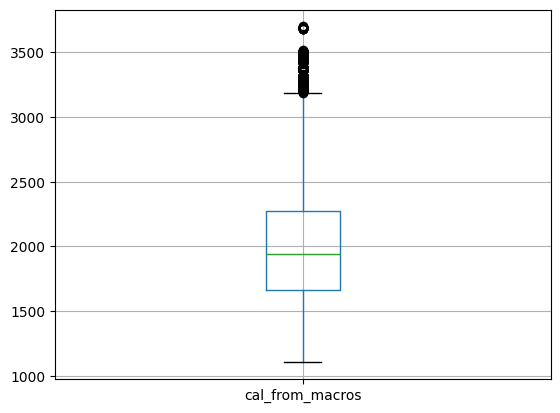

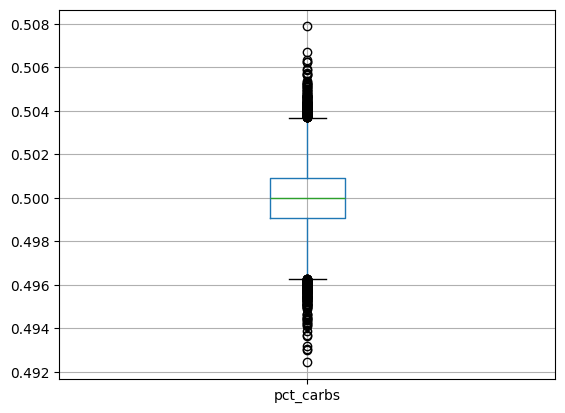

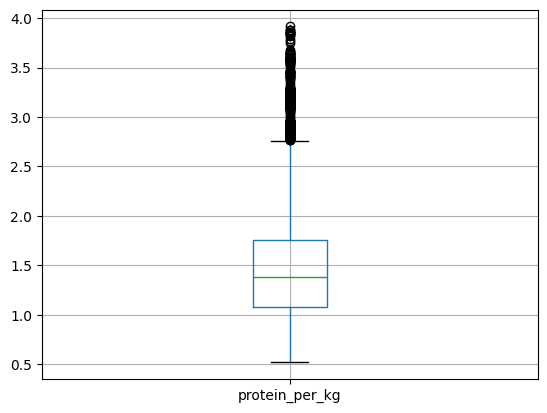

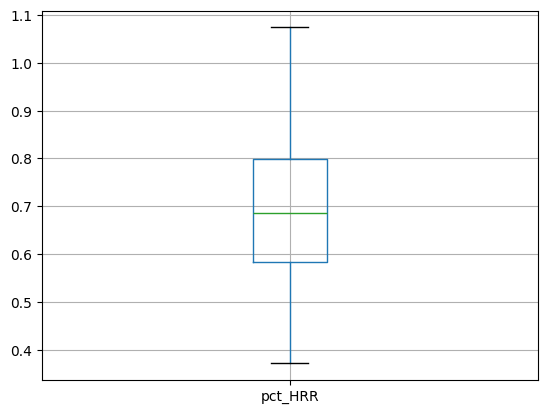

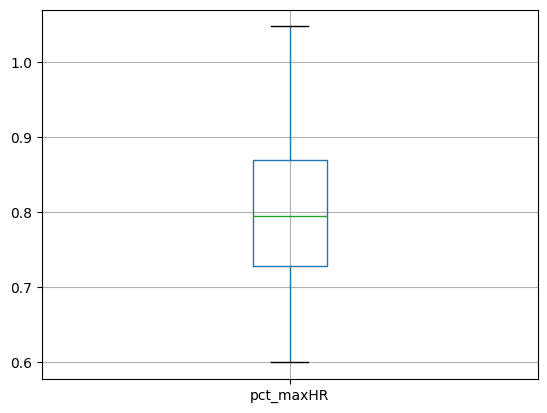

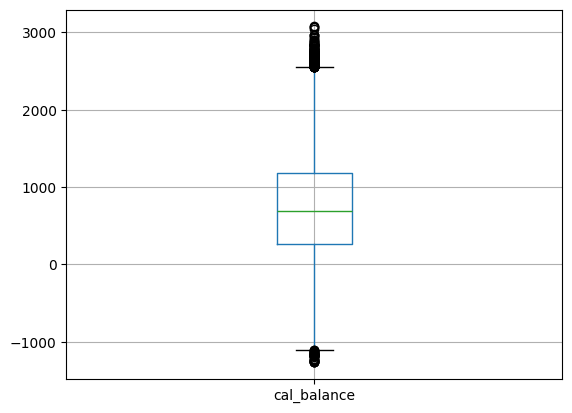

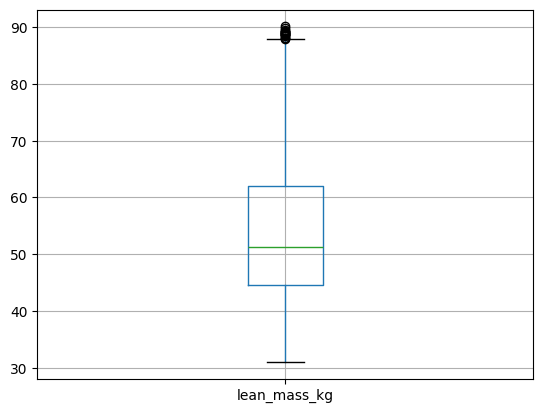

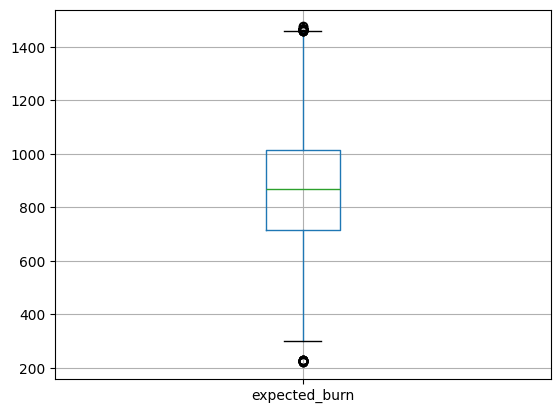

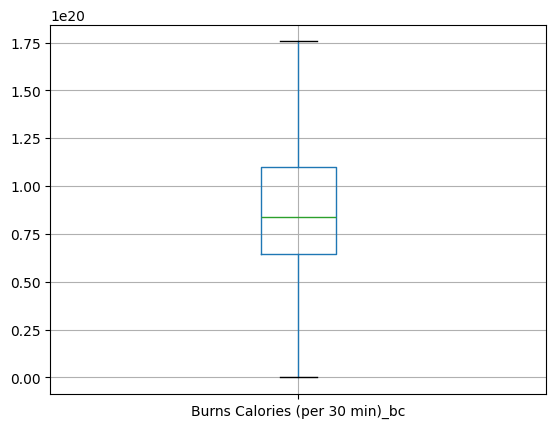

In [87]:
df1=df.select_dtypes(exclude=['object'])


for column in df1:
    plt.figure()
    df.boxplot([column])

plt.show()

# Régression Linéaire pour prédire le poids en fonctions de différents facteurs

[108.69271552  93.66503834  87.82460816 ...  46.0741424   71.37651461
 102.04054251]
0.8443721507019618


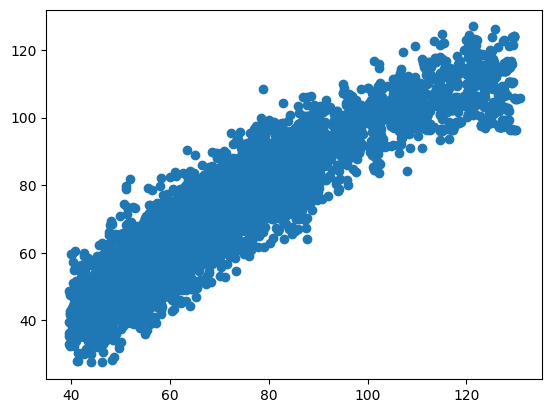

In [88]:
reg_Y = df['Weight (kg)']
reg_X = df[['Fat_Percentage', 'Session_Duration (hours)', 'Calories_Burned', 'Age', 'Proteins', 'Height (m)']]
regression = LinearRegression().fit(reg_X, reg_Y)
X_train, X_test, y_train, y_test = train_test_split(reg_X, reg_Y, test_size=0.3, random_state=42)
y_pred = regression.predict(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(y_pred)
print(r2)
plt.scatter(y_test, y_pred)

# Clustering 
Afin de voir si on peut distinguer des groupes d'individus aux caractéristiques similaires

In [95]:
variable_quali = df.select_dtypes(include=['object','category']).columns
indice_quali = [df.columns.get_loc(col) for col in variable_quali]
data = df.to_numpy()
kproto = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=2)
clusters = kproto.fit_predict(data, categorical = indice_quali)
print(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4212, ncost: 20747850693.830593
Run: 1, iteration: 2/100, moves: 2577, ncost: 20099422887.13662
Run: 1, iteration: 3/100, moves: 1726, ncost: 19619366806.20381
Run: 1, iteration: 4/100, moves: 1216, ncost: 19421539085.72911
Run: 1, iteration: 5/100, moves: 914, ncost: 19293114035.45856
Run: 1, iteration: 6/100, moves: 951, ncost: 19113246897.213852
Run: 1, iteration: 7/100, moves: 1158, ncost: 18860248606.653267
Run: 1, iteration: 8/100, moves: 1198, ncost: 18673557320.025757
Run: 1, iteration: 9/100, moves: 1011, ncost: 18538592995.203133
Run: 1, iteration: 10/100, moves: 761, ncost: 18463955201.93794
Run: 1, iteration: 11/100, moves: 569, ncost: 18424917396.83028
Run: 1, iteration: 12/100, moves: 379, ncost: 18405442144.74438
Run: 1, iteration: 13/100, moves: 259, ncost: 18396155001.4977
Run: 1, it


Centroïdes des clusters :
[['39.209833948339366' '66.79756984712758' '1.7078729573010047'
  '179.84324459673172' '143.4740774907743' '62.444978914074646'
  '1.6411491829204041' '2016.1254744333098' '24.512425354069304'
  '2.8120954138112952' '4.058526620980469' '2.5564022140221385'
  '22.987393252503832' '2.860419082762258' '0.5121244069583568'
  '247.72358197153451' '99.08553769109062' '66.06060358460779'
  '1873.2749077490776' '24.231494464944564' '1226.6354797047918'
  '149.89246968898252' '304.72830521876745' '34.44808908803363'
  '59.03103321033208' '3.033078545071191' '4.47602793885081'
  '19.85450711649978' '345.8977279915702' '22.987345402867465'
  '1981.781910911969' '0.5000038114648876' '1.5498191810114954'
  '0.6981714549529895' '0.801492900201357' '-142.85056668423712'
  '50.08056318575708' '1136.930189826039' 'Male' 'HIIT' 'Other' 'Lunch'
  'Keto' 'Steamed' 'Bulgarian Split Squats'
  'Builds explosive upper body power' 'Legs, Shoulders, Core' 'Wall'
  'Advanced' 'Legs' 'U

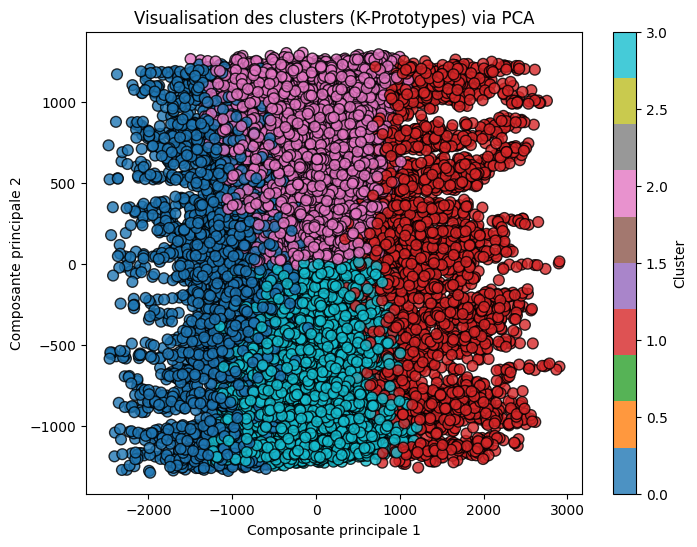

In [96]:
df['cluster'] = clusters  # ajout de la colonne cluster

print("\nCentroïdes des clusters :")
print(kproto.cluster_centroids_)

# --- Étape 3 : encodage des variables catégorielles pour la PCA ---
df_encoded = pd.get_dummies(df.drop('cluster', axis=1))

# --- Étape 4 : réduction de dimension (PCA) ---
pca = PCA(n_components=2)
components = pca.fit_transform(df_encoded)

# --- Étape 5 : visualisation graphique ---
plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=df['cluster'], cmap='tab10', s=60, alpha=0.8, edgecolor='k')
plt.title('Visualisation des clusters (K-Prototypes) via PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()

In [139]:
df_num = df.select_dtypes(include=['int64', 'float64', 'float32'])
X_scaled = StandardScaler().fit_transform(df_num)

pca = PCA(n_components=2)
pca.fit(X_scaled)

loadings = pd.DataFrame(
    pca.components_,
    columns=df_num.columns,
    index=['PC1', 'PC2']
)
contrib = (loadings**2).div((loadings**2).sum(axis=1), axis=0) * 100
pc1 = contrib.iloc[0]
pc2 = contrib.iloc[1]
print(pc1.abs().sort_values(ascending=False).head(7))
print(pc2.abs().sort_values(ascending=False).head(7))

Weight (kg)       13.644913
Calories          13.023509
lean_mass_kg      12.529955
BMI               11.820087
BMI_calc          11.820027
protein_per_kg    10.947403
Fat_Percentage    10.337445
Name: PC1, dtype: float64
cal_from_macros      18.769334
Proteins             18.765434
Carbs                18.764858
Fats                 18.763980
Physical exercise    10.253964
protein_per_kg        3.536905
Calories              1.519054
Name: PC2, dtype: float64


#### En analysant les valeurs propres on voit que la composante principale 1 est davantage composé de variable en lien avec le corps des individus (weight, lean mass, bmi...) et la composante principale 2 se concentre surtout sur l'aspect effort physique et alimentation. 

# Que peut-on en dire ?


In [123]:
cluster_resume = df.groupby('cluster').mean(numeric_only=True)
difference = (cluster_resume.max() - cluster_resume.min())/cluster_resume.mean()
variables_significatives = difference[difference > 0.10].index
print(cluster_resume[variables_significatives])
print(cluster_resume["Height (m)"])
cluster_resume.shape


         Weight (kg)  Session_Duration (hours)  Calories_Burned  \
cluster                                                           
0          66.797570                  1.641149      2016.125474   
1         108.019596                  1.098057      1026.637402   
2          65.635294                  1.187156      1129.755318   
3          67.071887                  1.194194      1132.074539   

         Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
cluster                                                                         
0             24.512425               2.812095                       4.058527   
1             32.192217               2.915730                       2.942274   
2             24.669819               2.475295                       3.129505   
3             25.035527               2.505659                       3.281491   

         Experience_Level        BMI  Physical exercise     Calories  \
cluster                               

(4, 38)

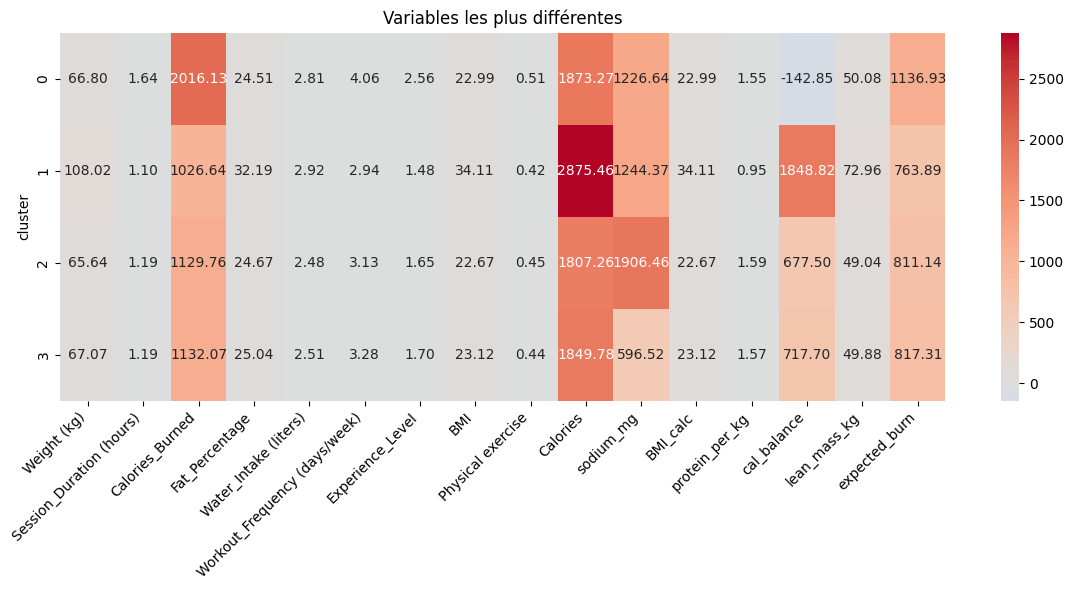

In [99]:
plt.figure(figsize=(12,6))
sns.heatmap(cluster_resume[variables_significatives], annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Variables les plus différentes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


On peut désormais avoir une interprétation des groupes, le groupe 0 représentée par les points bleu concernent les personnes qui ont des caractéristiques physiques "basses" mais qui ont des apports alimentaires assez variée au niveau des macronutriments, le groupe 1 lui représente les personnes avec des caractéristiques physiques plus élevée (poids, IMC plus elevée ainsi qu'un apport caloriques nettement supérieure) avec un apport en macronutriment assez élevée (on remarque que leur taux de masse maigre (67%) est le plus faible ici, cela pourrait donc signifier qu'il y'a une consommation de lipides et de glucides trop importante, et une consommation de protéine trop faible). Les groupes 3 et 4 représentes des individus avec des apports en macronutriments équilibrées et avec des caractéristiques physiques soit elevée ( )